In [ ]:
#SVM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
class SVM_classifier():
  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):
    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape
    # initiating the weight value and bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    # implementing Gradient Descent algorithm for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()

  # function for updating the weight and bias value
  def update_weights(self):
    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)
    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
      if (condition == True):
        dw = 2 * self.lambda_parameter * self.w
        db = 0
      else:
        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  # predict the label for a given input value
  def predict(self, X):
    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)
    return y_hat

classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter = 0.01)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [ ]:
# Naive Bayes
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows of the dataset
print(dataset.head())

# Selecting features (Age and EstimatedSalary) and target variable (Purchased)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling (not always necessary for Naive Bayes, but can be beneficial)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Naive Bayes classifier to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Evaluating the classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Note: Visualization of results can also be added if needed (e.g., plotting decision boundary)


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Confusion Matrix:
[[65  3]
 [ 7 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
Accuracy: 0.93

Confusion Matrix:
[[1142   95]
 [  83 1180]]

Classification Report:
              precision    recall  f1-score   support

  grapefruit       0.93      0.92      0.93      1237
      orange       0.93      0.93      0.93      1263

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500

Prediction for record 1: grapefruit
Prediction for record 2: grapefruit
Prediction for record 3: grapefruit


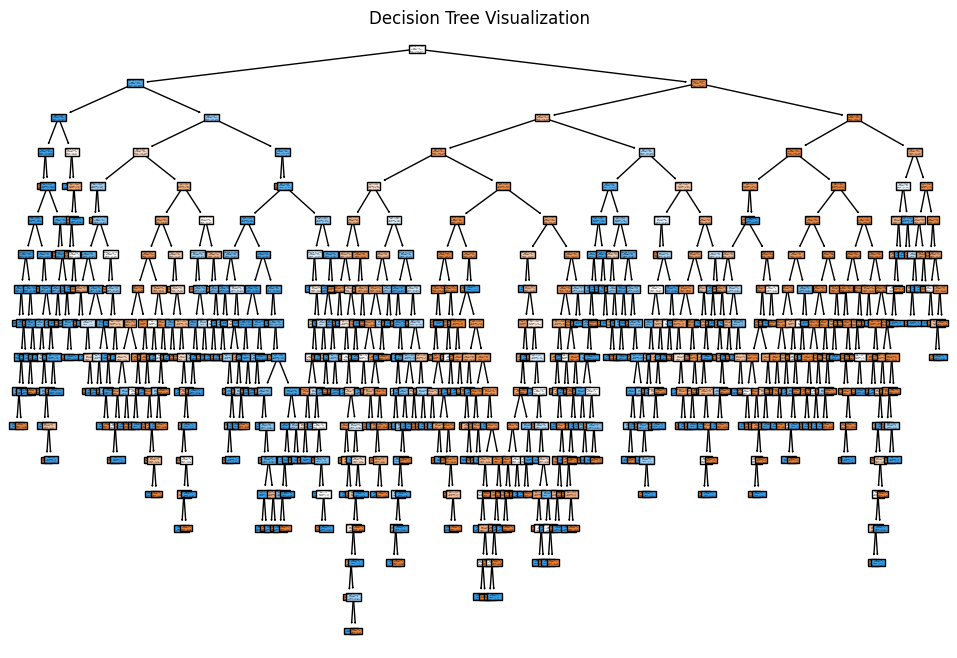

In [ ]:
# Dtree
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
dataset = pd.read_csv('citrus.csv')

# Display the first few rows of the dataset
print(dataset.head())

# Selecting features (diameter, weight, red, green, blue) and target variable (name)
X = dataset[['diameter', 'weight', 'red', 'green', 'blue']]
y = dataset['name']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fitting Decision Tree classifier to the Training set
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Assuming you have already trained and defined the Decision Tree Classifier `classifier`

# Example dataframe `df` with new records to predict
new_data = pd.DataFrame({
    'diameter': [5.5, 6.2, 4.8],
    'weight': [150, 180, 120],
    'red': [0.7, 0.6, 0.8],
    'green': [0.2, 0.3, 0.1],
    'blue': [0.1, 0.2, 0.3]
})

# Predicting results for new data
predicted_results = classifier.predict(new_data)

# Displaying the predicted results
for i, result in enumerate(predicted_results):
    print(f"Prediction for record {i + 1}: {result}")

# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size (optional)

# If your classifier is not trained on scaled features, you may want to use feature_names as below
feature_names = ['diameter', 'weight', 'red', 'green', 'blue']
class_names = ['orange', 'not orange']  # Assuming these are your target classes

plot_tree(classifier, filled=True, feature_names=feature_names, class_names=class_names)
plt.title("Decision Tree Visualization")
plt.show()




<ipython-input-4-5eaa387b6804>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


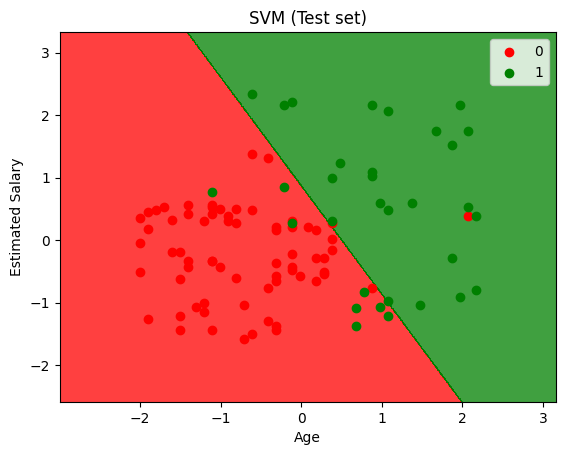

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Binary Classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Separate features and target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target variable (last column)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Step 7: Display results
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
print(X_test[5])


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

[ 0.68185612 -0.55781411  0.13973176  0.7522648   0.93474906  0.7391229
 -0.4313122   1.92210795]


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


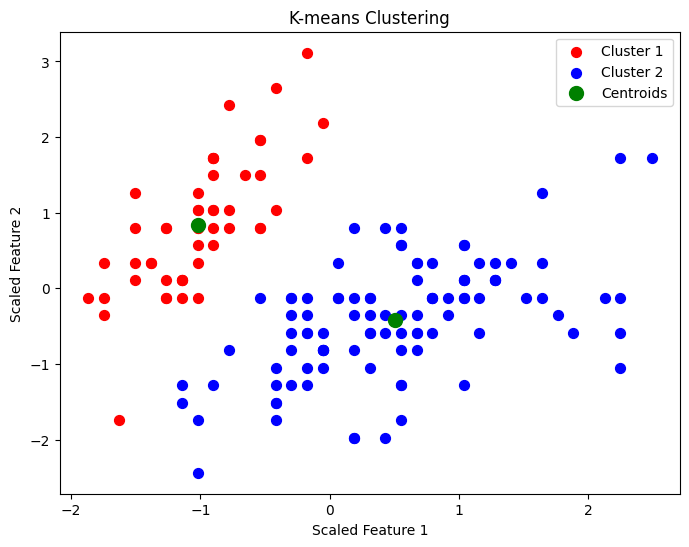

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print(df.head())

# Selecting features (assuming columns are properly named)
X = df.iloc[:, [1, 2, 3, 4]].values  # Features: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

# Feature scaling (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 6))

# Plotting the points with color-coded clusters
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=50, c='blue', label='Cluster 2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='green', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.show()


   weight  age  height size
0      62   28  172.72   XL
1      59   36  167.64    L
2      61   34  165.10    M
3      65   27  175.26    L
4      62   45  172.72    M


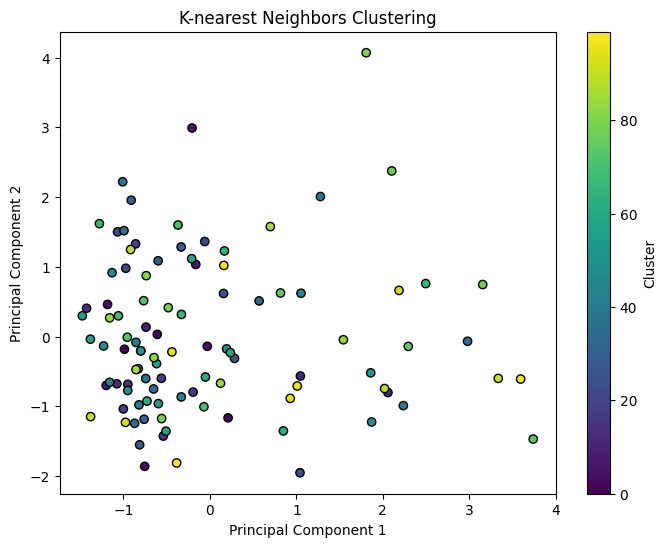

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA  # Optional for dimensionality reduction

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(df.head())

# Selecting features
X = df[['weight', 'age', 'height', 'size']].values

# Encode categorical data (assuming 'size' is categorical)
label_encoder = LabelEncoder()
X[:, 3] = label_encoder.fit_transform(X[:, 3])  # Encode 'size' column

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-nearest neighbors clustering
k = 2  # Number of neighbors (clusters)
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

# Visualizing the clusters (optional: using PCA for dimensionality reduction)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=indices[:, 0], cmap='viridis', edgecolor='k')
plt.title('K-nearest Neighbors Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  CREDIT_LIMIT  \
0                    95.4      0.000000             0.166667          1000   
1                     0.0   6442.945483             0.000000          7000   
2                     0.0      0.000000             1.000000          7500   
3                     0.0    205.788017             0.083333          7500   
4                     0.0      0.000000             0.083333          1200   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.34

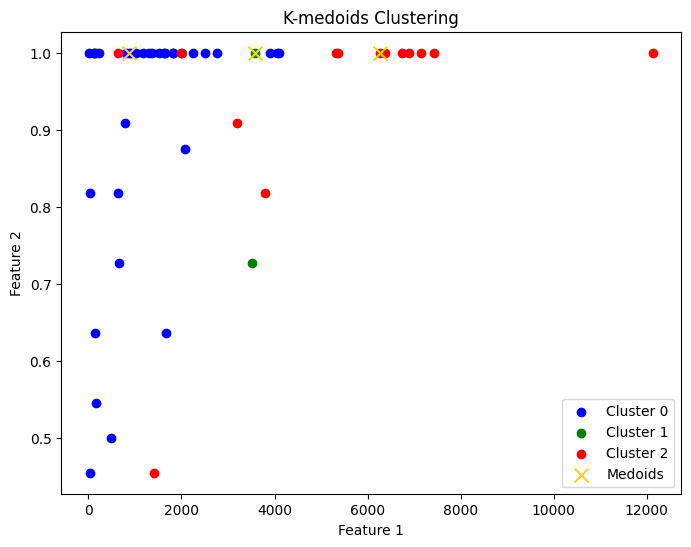

In [ ]:
#K medoids
!pip install pyclustering
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample

# Load the dataset
df = pd.read_csv('credit card.csv')

# Display the first few rows of the dataset
print(df.head())

# Selecting features
X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
        'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].values

# Performing K-medoids clustering
n_clusters = 3  # Number of clusters (you can adjust this)
initial_medoids = [0, 1, 2]  # Initial medoid indices (you can adjust this)
kmedoids_instance = kmedoids(X, initial_medoids, data_type='points')
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Visualizing the clusters (you can customize this part)
cluster_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    cluster_points = X[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=cluster_colors[i], label=f'Cluster {i}')

plt.scatter(X[medoids, 0], X[medoids, 1], c='gold', marker='x', s=100, label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
